<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/main/Interactive_modules/Classifier_boundary_visualization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effect of parameters on the classification of different type of datasets and decision boundary visualization for different classifiers

The data shown below i.e. Case 1 shows a circular datashape with two different classes. It can be easily seen that this type of data cannot be separated using a linear boundary.

Text(0.5, 1.0, 'Case --> 1')

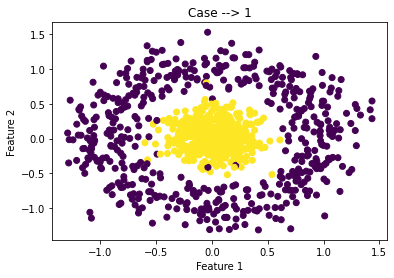

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x1, y1 = make_circles(n_samples=1000,noise=0.2, factor=0.05, random_state=3102)

plt.scatter(x1[:,0],x1[:,1],c=y1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case --> 1')

The blobs shown below can be separated with a simple linear boundary

Text(0.5, 1.0, 'Case --> 2')

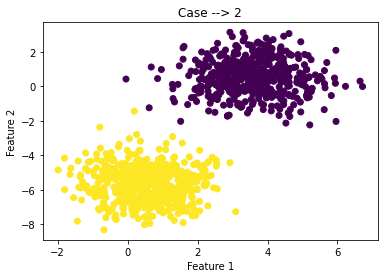

In [ ]:
x2, y2 = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=3102)

plt.scatter(x2[:,0],x2[:,1],c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case --> 2')

The data shown below is complex and cannot be simply separated using a linear boundary.

Text(0.5, 1.0, 'Case --> 3')

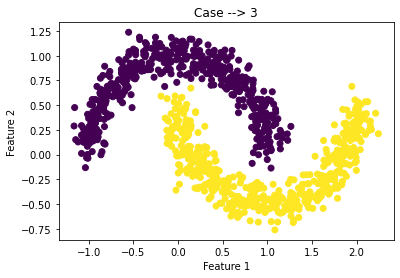

In [ ]:

x3, y3 = make_moons(n_samples=1000,noise=0.1, random_state=3102)

plt.scatter(x3[:,0],x3[:,1],c=y3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Case --> 3')

## Support vector classification - SVC 

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection

An SVC maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.


More information can be found in here: https://scikit-learn.org/stable/modules/svm.html#svm-classification


### Here, we investigate into the effect of different kernels and regularization parameter for each of the kernels to avoid overfitting.

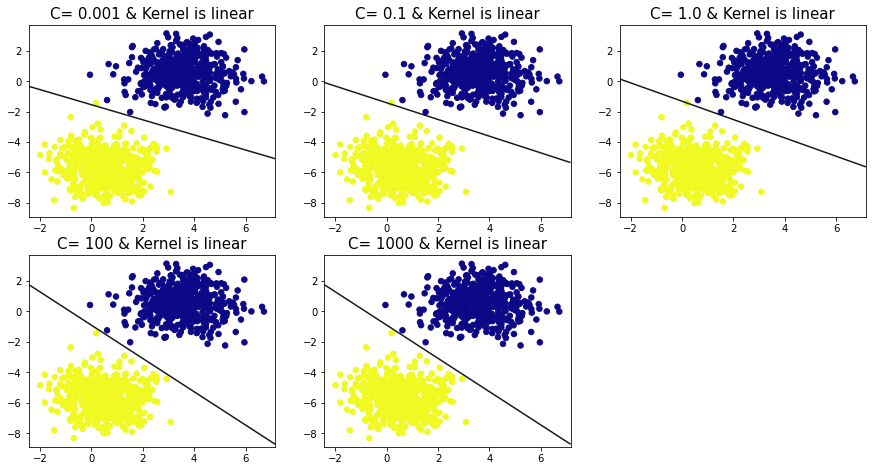

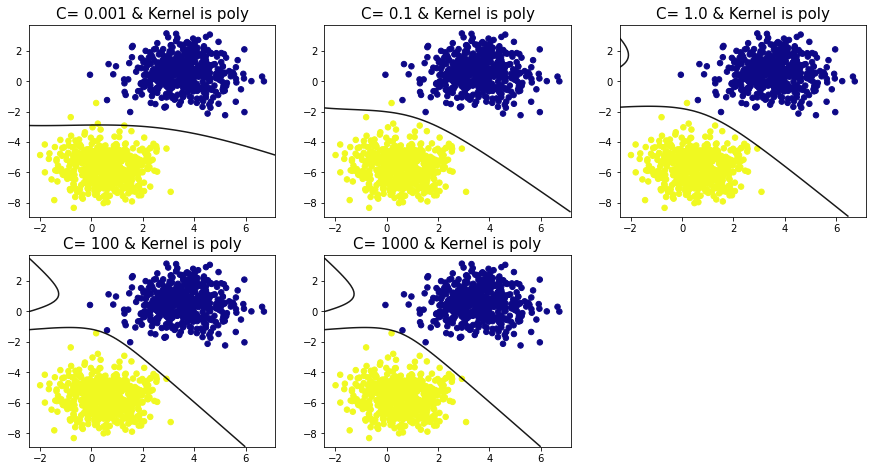

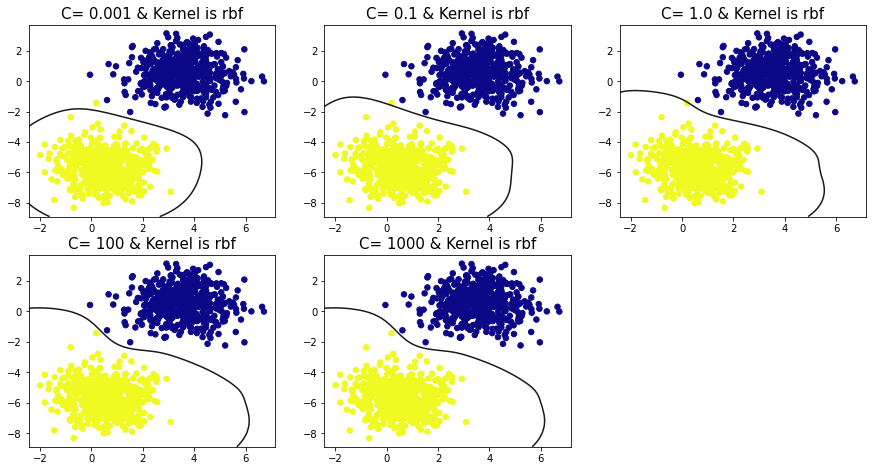

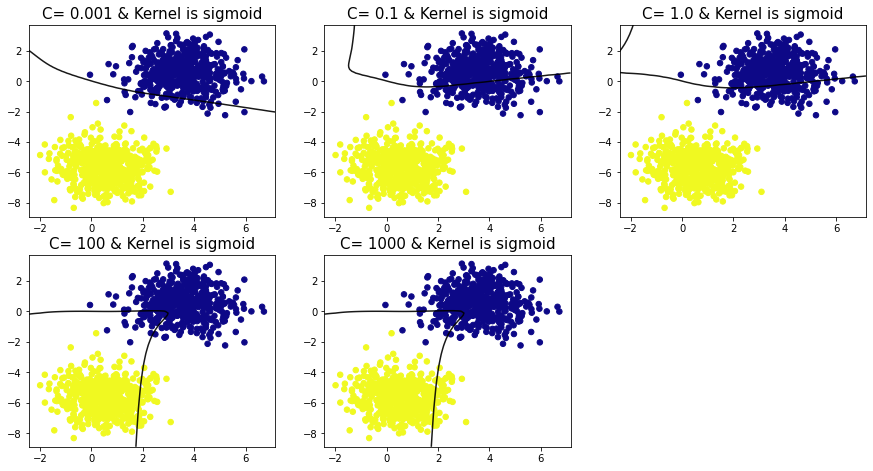

In [ ]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

x=x2
y=y2


for j,kk in enumerate(['linear','poly','rbf','sigmoid']):
    
    
    plt.figure(figsize=(15,12))
#     plt.title('Kernel Choice')
    for i,cc in enumerate([0.001,0.1,1.0,100,1000]):
                
        plt.subplot(3,3,i+1)
        
        clf = svm.SVC(kernel=kk,gamma='auto', C=cc)
            # clf=KNeighborsClassifier(n_neighbors=3)
        clf.fit(x, y)
        plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='plasma')
        plt.title('C= ' +str(cc) + ' & Kernel is ' + str(kk) ,fontsize=15)
        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
            # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100)
        yy = np.linspace(ylim[0], ylim[1], 100)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
            # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.9,
                       linestyles=['-'])
        
        # # plot support vectors
            # ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            #            linewidth=1, facecolors='none', edgecolors='k')
            # plt.show()

        


#### The data above shows that this data is linearly separable and a linear kernel can do an excellent job at that. Not only that but in this case, different kernels like rbf, sigmoid and polynomial as well separate the data well when choosing an appropriate hyperparameter.


However, this may not be true for all different data scenarios.

### **Question 1: For dataset X3 and Y3, find the optimum kernel and the value of hyperparameters that can effciently separate the two different classes. Please show your code and a plot like the ones shown above?**

In [ ]:
############################

# TYPE YOUR CODE IN HERE #

############################

### **Question 2 For dataset X1 and Y1, using the rbf kernel find the optimum value of hyperparameters that can effciently separate the two different classes. Please show your code and a plot like the ones shown above?**


In [ ]:
############################

# TYPE YOUR CODE IN HERE #

############################


The C parameter is esentially a regularization parameter that tells the SVM optimization how much you want to avoid misclassifying each training example. It controls the trade off between acheiving  low error on training data and minmizing the norm of weights. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

## Further, a robust way to examine the same is by assessing the performance on the test set and noting the classification accuracy. 

The data can be split into training and testing set and the model can be trained using different kernels and different values of regularization parameters. The effect can be seen on testing classification accuracy. When a model is trained keeping in mind the generalization ability, we will be abe to train a robust classifier that can correctly classify the correct test samples.

## Quadratic discriminant analysis

Quadratic discriminant analysis, as its name suggests is a classifier with quadratic decision boundary, generated by fitting class conditional densities to data and uses Bayes' rule.

More information can be found in here: https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda


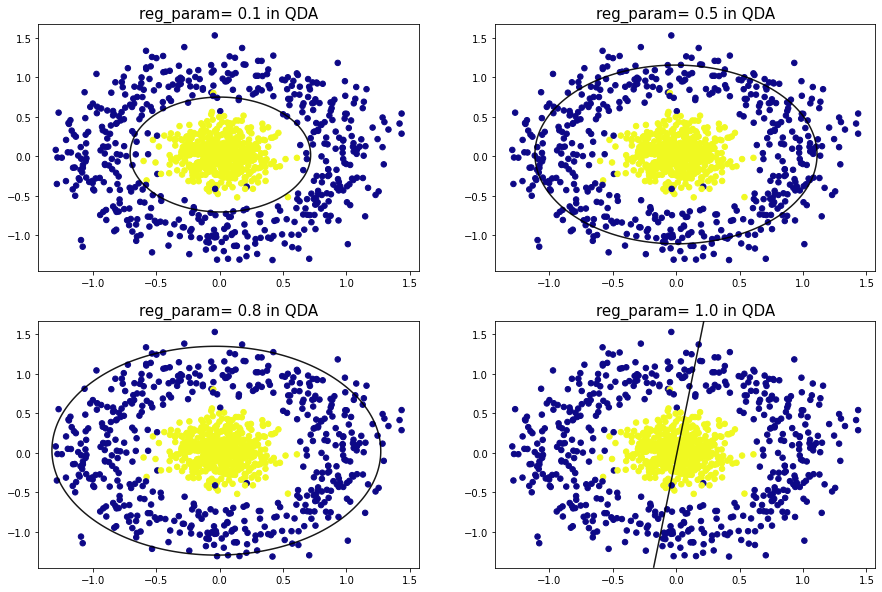

In [ ]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


x=x1
y=y1


for j,kk in enumerate(['1']):
    
    
    plt.figure(figsize=(15,10))
#     plt.title('Kernel Choice')
    for i,cc in enumerate([0.1,0.5,0.8,1.0]):
                
        plt.subplot(2,2,i+1)
        
        clf = QuadraticDiscriminantAnalysis( reg_param=cc)
            # clf=KNeighborsClassifier(n_neighbors=3)
        clf.fit(x, y)
        plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='plasma')
        plt.title('reg_param= ' +str(cc) + ' in QDA' ,fontsize=15)
        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
            # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100)
        yy = np.linspace(ylim[0], ylim[1], 100)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
            # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.9,
                       linestyles=['-'])
        
       

        


As seen above, with an appropriate regularization and tuning parameter, these clusters can be separate using an appropriate boundary in Quadratic discriminant analysis

Similarly, QDA can seprate linear data very well irrespective of the reg_param

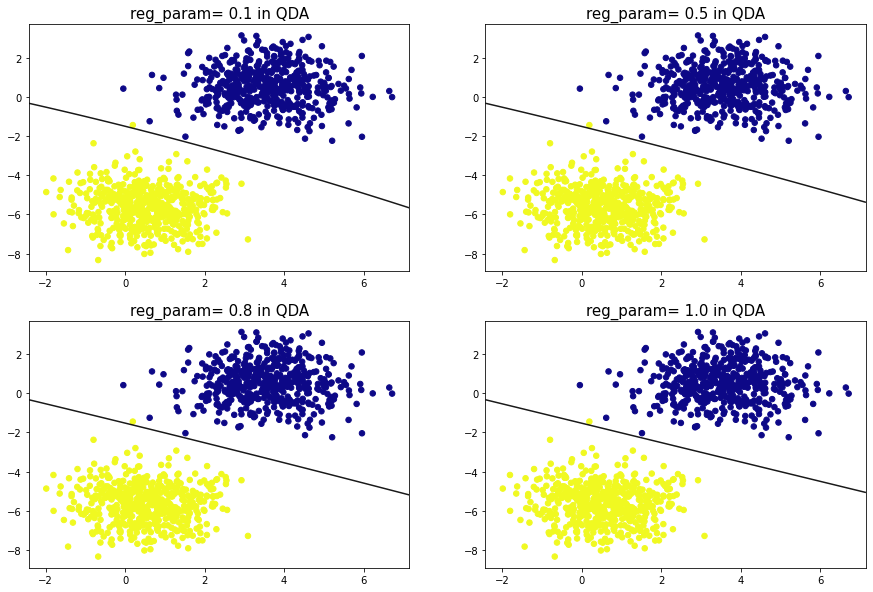

In [ ]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

x=x2
y=y2


for j,kk in enumerate(['1']):
    
    
    plt.figure(figsize=(15,10))
#     plt.title('Kernel Choice')
    for i,cc in enumerate([0.1,0.5,0.8,1.0]):
                
        plt.subplot(2,2,i+1)
        
        clf = QuadraticDiscriminantAnalysis( reg_param=cc)
            # clf=KNeighborsClassifier(n_neighbors=3)
        clf.fit(x, y)
        plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='plasma')
        plt.title('reg_param= ' +str(cc) + ' in QDA' ,fontsize=15)
        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
            # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100)
        yy = np.linspace(ylim[0], ylim[1], 100)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
            # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.9,
                       linestyles=['-'])
        
      
        


However, for the moon shaped samples, it is difficult to separate even with appropr[riate tuning

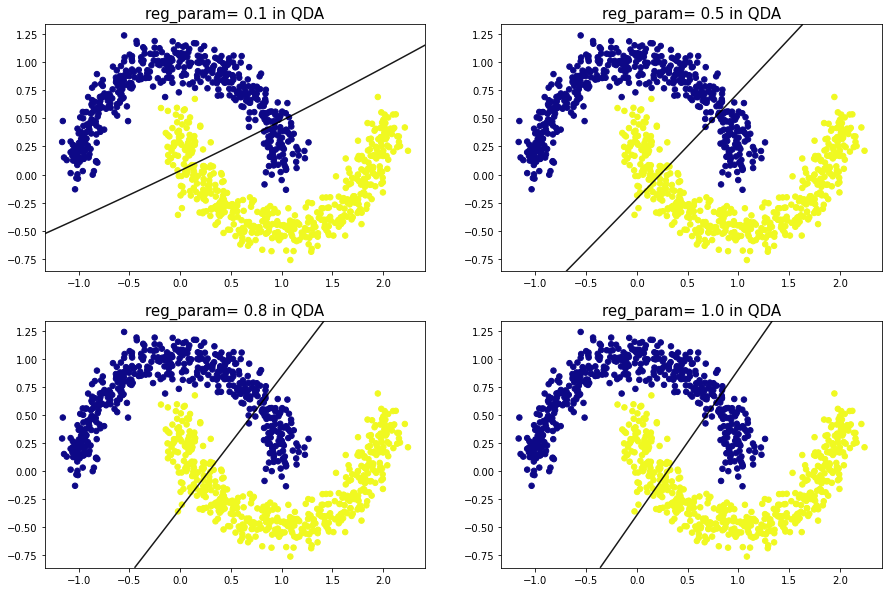

In [ ]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


x=x3
y=y3


for j,kk in enumerate(['1']):
    
    
    plt.figure(figsize=(15,10))
#     plt.title('Kernel Choice')
    for i,cc in enumerate([0.1,0.5,0.8,1.0]):
                
        plt.subplot(2,2,i+1)
        
        clf = QuadraticDiscriminantAnalysis( reg_param=cc)
            # clf=KNeighborsClassifier(n_neighbors=3)
        clf.fit(x, y)
        plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='plasma')
        plt.title('reg_param= ' +str(cc) + ' in QDA' ,fontsize=15)
        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
            # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100)
        yy = np.linspace(ylim[0], ylim[1], 100)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
            # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.9,
                       linestyles=['-'])
        
      


This data can be separated well by other complex classification algorithms like SVM,KNeighbors classifier, decision trees etc with the choice of appropriate tuning parameters.

#KNN

Nearest neighbors finds samples cosest in distance to a new point to predict new labels. A query point is asigned the data class which has the most representatives within the nearest neighbors of the point. 

The optimal choice of k is of paramount importance and is generally data dependent. In each of the test cases, we know we are using two different classes of data and hence the value of k for demonstration purpose is fixed to 2. 

More information on Kneighbors can be found here: https://scikit-learn.org/stable/modules/neighbors.html#classification

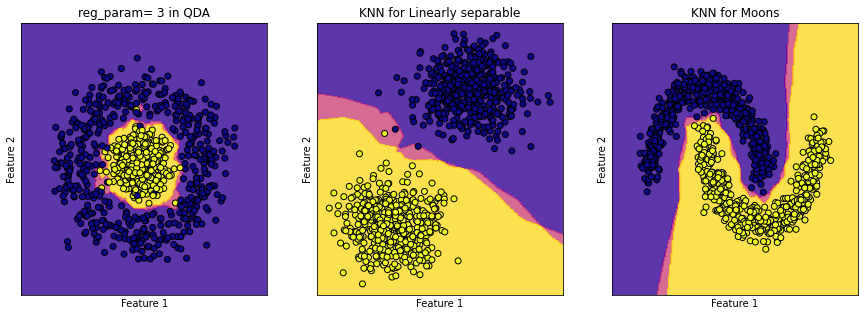

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,5))
i=1
for x in (x1,x2,x3):

  if i==1:
    y=y1
  elif i==2:
    y=y2
  elif i==3:
    y=y3
    
  h = .02  # step size in the mesh

  x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

  # cm = plt.cm.RdBu
  # cm_bright = ListedColormap(['#FF0000', '#0000FF'])


  cm = 'plasma'
  cm_bright ='plasma'

  clf=KNeighborsClassifier(n_neighbors=2)
  clf.fit(x, y)

  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]




  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax = plt.subplot(1,3,i)

  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  # Plot the training points
  ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright,
                    edgecolors='k')
  

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  

  if i==1:
    ax.set_title('reg_param= ' +str(cc) + ' in QDA')
  elif i==2:
    ax.set_title('KNN for Linearly separable')
  elif i==3:
    ax.set_title('KNN for Moons')
    
  
  i=i+1

AS seen in the figure above, Kneighbors classifier without any extensive tuning is able to classify the two classes well for all the three sampple datasets. Python does not support the decision function for these methods. However, we can always use the predict_proba attribute to extract the probability estimates of correct classification  which can be visualized using color maps as shown above.

## Decision Trees classifier

Decision tree cretaes a model by learning simple decison rules that are learned from data features. Decision trees can be seen as a set of if-else decision rules.

More information can be found in here: https://scikit-learn.org/stable/modules/tree.html#tree

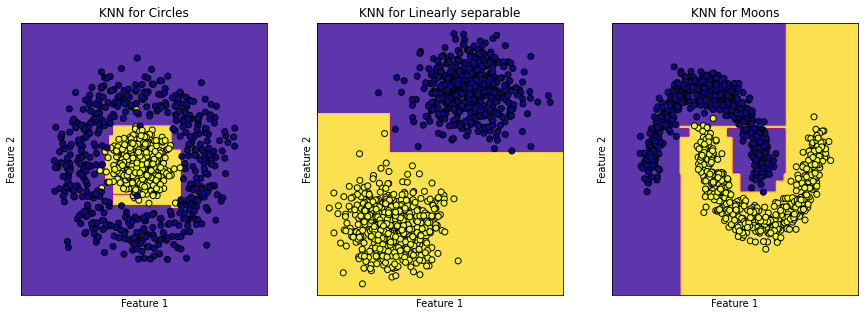

In [ ]:
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(15,5))
i=1
for x in (x1,x2,x3):

  if i==1:
    y=y1
  elif i==2:
    y=y2
  elif i==3:
    y=y3
    
  h = .02  # step size in the mesh

  x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

  # cm = plt.cm.RdBu
  # cm_bright = ListedColormap(['#FF0000', '#0000FF'])


  cm = 'plasma'
  cm_bright ='plasma'

  clf=DecisionTreeClassifier()
  clf.fit(x, y)

  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]




  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax = plt.subplot(1,3,i)

  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  # Plot the training points
  ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright,
                    edgecolors='k')
  

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  

  if i==1:
    ax.set_title('KNN for Circles')
  elif i==2:
    ax.set_title('KNN for Linearly separable')
  elif i==3:
    ax.set_title('KNN for Moons')
    
  
  i=i+1

The results above show that decision trees is able to separate the data very well in all the 3 cases no matter what the shape of data or decision boundary. However, the parameters play an important role in data separation.

Especially the **max_depth** parameter. This parameter specifies the maximum depth of the tree. In the above, code it is set to default which means that the nodes are expanded until all leaves are pure or contain minimum samples specified.

Further, lets explore the effect of max depth parameter on the circle and moons dataset.

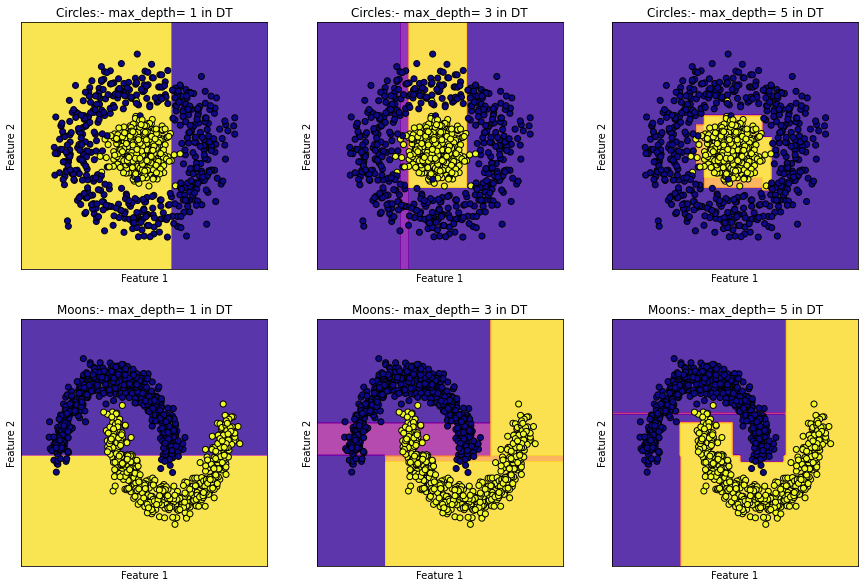

In [ ]:
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(15,10))
i=1

# x=x2
# y=y2


for x in (x1,x3):
  if i==1:
    y=y1
  elif i==2:
    y=y3
  
  for cc in [1,3,5]:

      
    h = .02  # step size in the mesh

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

    # cm = plt.cm.RdBu
    # cm_bright = ListedColormap(['#FF0000', '#0000FF'])


    cm = 'plasma'
    cm_bright ='plasma'

    clf=DecisionTreeClassifier(max_depth=cc)
    clf.fit(x, y)

    if hasattr(clf, "decision_function"):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]




    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(2,3,i)

    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright,
                      edgecolors='k')
    

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    if i<4:
      ax.set_title('Circles:- max_depth= ' +str(cc) + ' in DT')
    elif i>3:
      ax.set_title('Moons:- max_depth= ' +str(cc) + ' in DT')
    
    
    i=i+1

The figure above shows the effect of max depth parameter. For each of the cases, we can see that the separation is slightly better with max_depth =3 in comparison to when max_depth = 1. Also, the classifier performance improves significantly when the max_depth is chosen to be 5 in each of the test cases. 

Thus, with decision trees, when the depth parameter is chosen appropriately it can be a robust method for classification.